###**Proyecto: Análisis Exploratorio de Datos (EDA) 🔍📊**

Este proyecto desarrolla un análisis exploratorio completo siguiendo los 11 pasos fundamentales del EDA. El objetivo principal es comprender la estructura del dataset Boston Housing, identificar los patrones que afectan el valor de las viviendas, detectar anomalías y preparar los datos para un ejercicio básico de predicción del precio medio de las propiedades.

###**Paso 1: Importar Librerías** 💻
Importar pandas, numpy, matplotlib, seaborn, sklearn y otras librerías necesarias.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

###**Paso 2: Importar Datos 💻**

En esta etapa del proyecto se procede a cargar el Boston Housing Dataset directamente desde la URL oficial. Este conjunto de datos reúne información socioeconómica, ambiental y estructural de distintos barrios de Boston, y es ampliamente utilizado para el análisis de factores que influyen en el valor medio de las viviendas.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style='whitegrid')
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

df = pd.read_csv(url)

df_original = df.copy()

print("Dataset Boston Housing cargado correctamente:")
df.head()


Dataset Boston Housing cargado correctamente:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.shape


(506, 14)

###**Paso 3: Revisión de Datos Faltantes (NaN)**💻

En esta etapa del análisis se realiza una inspección detallada del dataset para identificar la presencia de valores faltantes, inconsistencias o posibles problemas de calidad en los datos.

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


df.info() muestra la cantidad de datos no nulos y el tipo de dato de cada variable

In [37]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


###Al revisar los valores faltantes mediante df.isna().sum(), se encontró que todas las columnas presentan cero valores nulos

###**Paso 3.1: Generar Datos NaN (para fines de demostración)** 💻
Para demostrar cómo manejar datos faltantes, crearemos una copia del DataFrame `df` (`df_with_nans`) y luego introduciremos valores `NaN` aleatoriamente en un 10% de sus celdas.

In [39]:
df_with_nans = df.copy()

# Columnas en las que se insertarán NaN
columns_to_corrupt = ['rm', 'lstat']

# Para cada columna seleccionada, introducimos NaN en el 10% de sus filas
np.random.seed(42) # Para reproducibilidad
for col in columns_to_corrupt:
    num_rows_to_corrupt = int(len(df_with_nans) * 0.1)
    random_indices = np.random.choice(df_with_nans.index, num_rows_to_corrupt, replace=False)
    df_with_nans.loc[random_indices, col] = np.nan

print("DataFrame con NaN generados en columnas específicas:")
display(df_with_nans.head())

DataFrame con NaN generados en columnas específicas:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Ahora, verificaremos la cantidad de valores `NaN` por columna en nuestro nuevo DataFrame `df_with_nans`.

In [40]:
df_with_nans.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,50
age,0
dis,0
rad,0
tax,0


In [41]:
df_with_nans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       456 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    456 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


##**Verificamos que tipo de variable son rm y Lstat** 🧾
1.   Rm = decimal
2.   Lstat = decimal



###**Grafica de datos NAN**💻

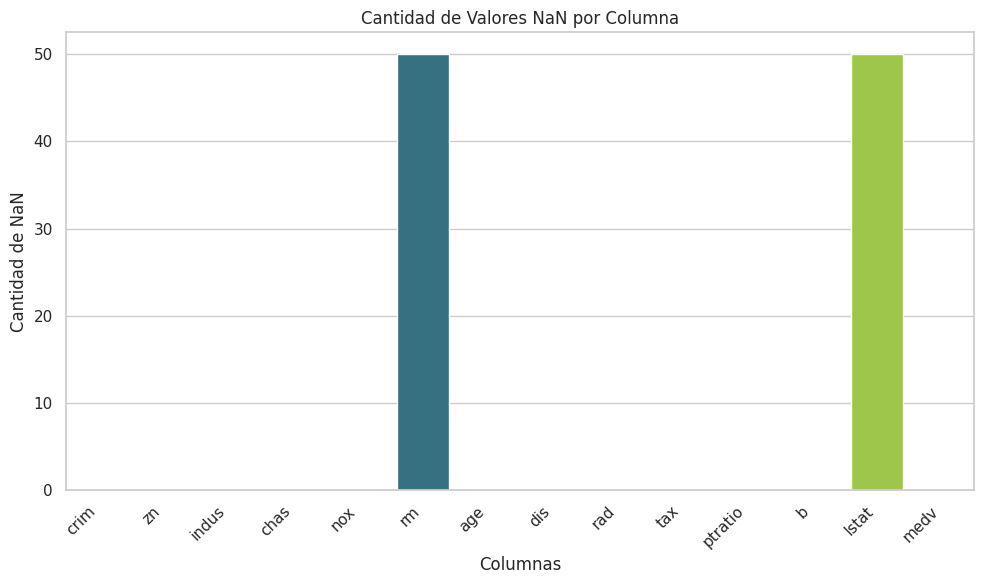

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_with_nans.isna().sum().index, y=df_with_nans.isna().sum().values, palette='viridis', hue=df_with_nans.isna().sum().index, legend=False)
plt.title('Cantidad de Valores NaN por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de NaN')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Paso 4: Limpieza de Datos usando KNN 💻**
En esta etapa se aplican las técnicas necesarias para preparar el dataset antes del análisis avanzado.


In [13]:
df_vecinos = df_with_nans.copy()

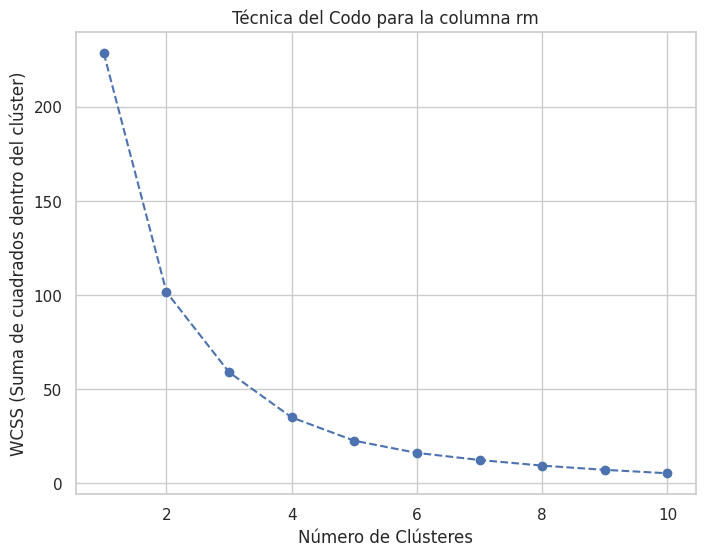

In [43]:
from sklearn.cluster import KMeans

X = df_vecinos["rm"].dropna().values.reshape(-1, 1)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Técnica del Codo para la columna rm")
plt.xlabel("Número de Clústeres")
plt.ylabel("WCSS (Suma de cuadrados dentro del clúster)")
plt.grid(True)
plt.show()


###**Conclusion** 🧾
### El punto de inflexión (codo) se encuentra en k = 3, *siendo* este el valor óptimo para usar en la imputación con KNN de la variable rm.

In [44]:
from sklearn.impute import KNNImputer

# Seleccionar la columna como DataFrame (no Serie)
col_rm = df_vecinos[["rm"]]

# Crear el imputador con 3 vecinos (estilo profesor)
imputer_rm = KNNImputer(n_neighbors=3)

# Aplicar imputación
rm_imputada = imputer_rm.fit_transform(col_rm)

# Reemplazar en el DataFrame original
df_vecinos["rm"] = rm_imputada

df_vecinos["rm"]


,rm
0,6.298789
1,6.421000
2,6.298789
3,6.998000
4,7.147000
...,...
501,6.298789
502,6.120000
503,6.976000
504,6.794000


In [18]:
df_vecinos.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


###**Conclusion** 🧾
Los resultados muestran que la columna lstat aún conserva 50 valores faltantes, mientras que rm ya fue imputada correctamente.

###**Técnica del codo para lstat** 💻

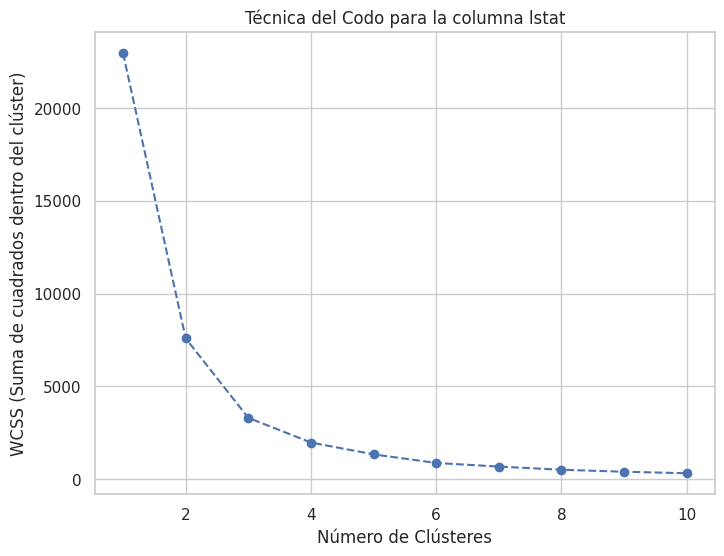

In [45]:
from sklearn.cluster import KMeans

X = df_vecinos["lstat"].dropna().values.reshape(-1, 1)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Técnica del Codo para la columna lstat")
plt.xlabel("Número de Clústeres")
plt.ylabel("WCSS (Suma de cuadrados dentro del clúster)")
plt.grid(True)
plt.show()


###**Conclusion** 🧾
### El punto de inflexión (codo) se encuentra en k = 3, *siendo* este el valor óptimo para usar en la imputación con KNN de la variable lstat.

In [46]:
from sklearn.impute import KNNImputer

# Seleccionar la columna como DataFrame (no Serie)
col_lstat = df_vecinos[["lstat"]]

# Crear el imputador con 3 vecinos (igual que el profesor)
imputer_lstat = KNNImputer(n_neighbors=3)

# Aplicar imputación
lstat_imputada = imputer_lstat.fit_transform(col_lstat)

# Reemplazar en el DataFrame original
df_vecinos["lstat"] = lstat_imputada

df_vecinos["lstat"]


,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [30]:
df_vecinos.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


###**Conclusion** 🧾
El DataFrame quedó completamente limpio, sin valores NaN en ninguna columna, lo cual garantiza que los siguientes pasos del análisis (EDA, correlaciones, modelos, etc.) se puedan realizar sin problemas.


###**Paso 5: Realizar Gráficas para Analizar Tendencias**📌
En este paso se visualizan las variables más relevantes del Boston Housing Dataset con el fin de identificar distribuciones, patrones, posibles outliers y relaciones entre variables.

###**Histograma — Tendencias de distribución**📊

###**Histograma de rm** 📊

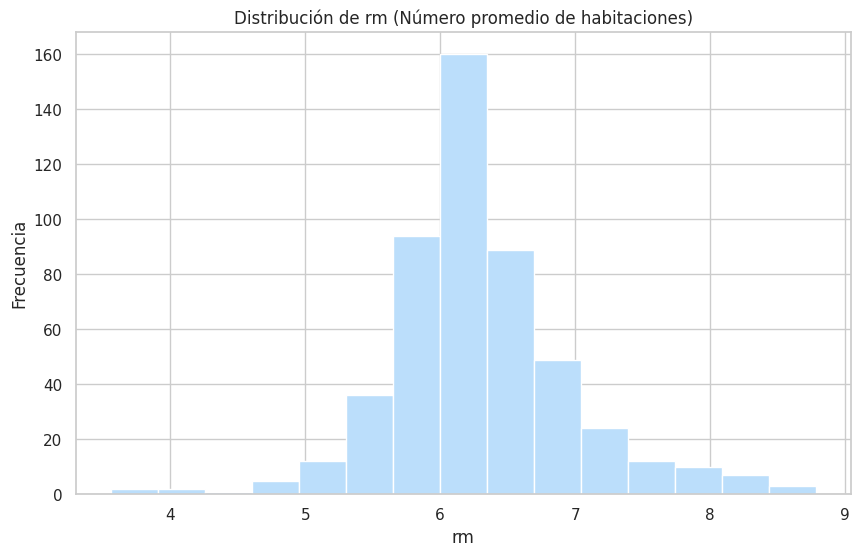

In [47]:
plt.figure(figsize=(10,6))
plt.hist(df_vecinos['rm'], bins=15, fill=True, color='#bbdefb')
plt.title('Distribución de rm (Número promedio de habitaciones)')
plt.xlabel('rm')
plt.ylabel('Frecuencia')
plt.show()


###**Conclusión**
La mayoría de viviendas tienen entre 5 y 7 habitaciones, lo cual sugiere un tamaño residencial típico en Boston.

###**Histograma de lstat**📊

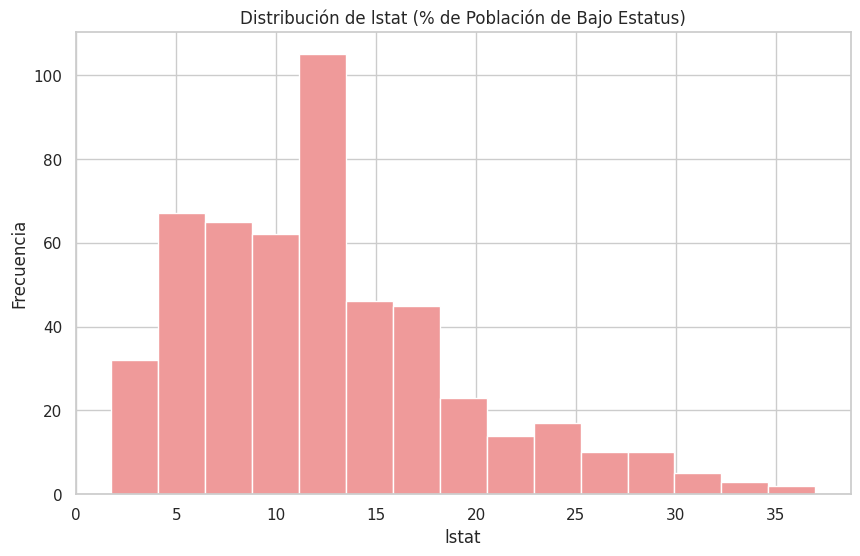

In [48]:
plt.figure(figsize=(10,6))
plt.hist(df_vecinos['lstat'], bins=15, fill=True, color='#ef9a9a')
plt.title('Distribución de lstat (% de Población de Bajo Estatus)')
plt.xlabel('lstat')
plt.ylabel('Frecuencia')
plt.show()


###**Conclusión**
La distribución está sesgada hacia la derecha, lo que indica que muchas zonas tienen bajos niveles de pobreza, pero algunas presentan valores muy altos.

###**Histograma de medv (Precio medio de las viviendas)** 📊


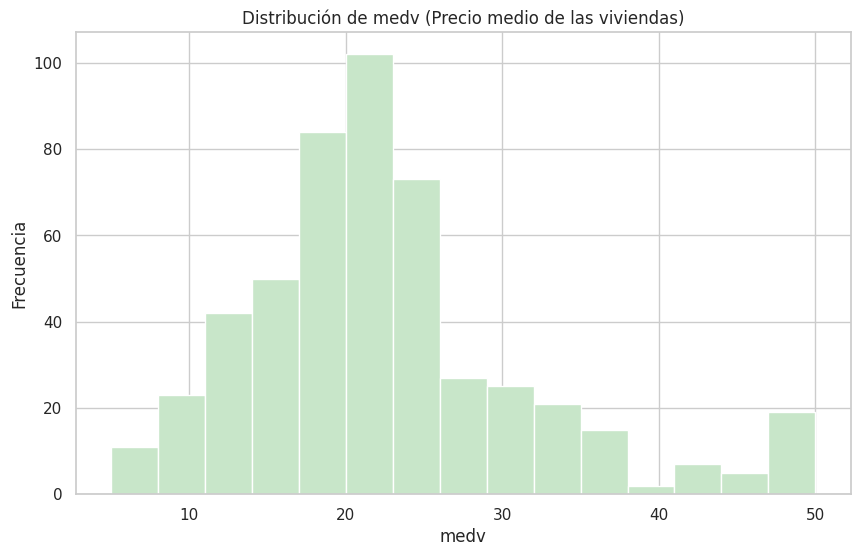

In [49]:
plt.figure(figsize=(10,6))
plt.hist(df_vecinos['medv'], bins=15, fill=True, color='#c8e6c9')
plt.title('Distribución de medv (Precio medio de las viviendas)')
plt.xlabel('medv')
plt.ylabel('Frecuencia')
plt.show()


###**Conclusión** 🏡📊
De esta diagrama se concluyo:
1.   La mayoría de los precios de las viviendas se concentran entre 15 y 25 mil dólares
2.   Se observan pocos valores extremos cercanos a 50, lo cual confirma que los precios muy altos.



###**Scatter Plot 1: Relación entre rm (habitaciones) y medv (precio medio)**📊


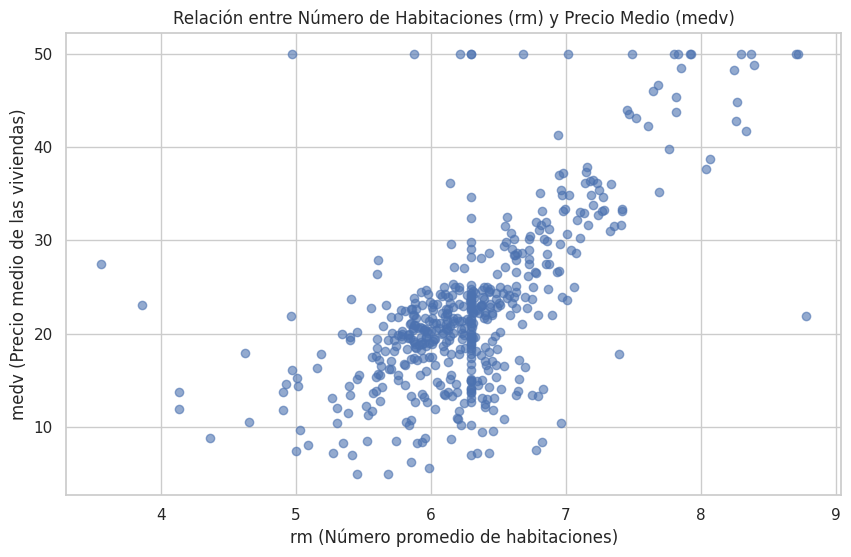

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df_vecinos['rm'], df_vecinos['medv'], alpha=0.6)
plt.title('Relación entre Número de Habitaciones (rm) y Precio Medio (medv)')
plt.xlabel('rm (Número promedio de habitaciones)')
plt.ylabel('medv (Precio medio de las viviendas)')
plt.show()


###**texto en negrita**🧾
De acuerdo con la gráfica anterior:

1.   A mayor número de habitaciones (rm), mayor es el valor promedio de la vivienda
2.   Las viviendas con menos de 5 habitaciones muestran una gran variabilidad en los precios


###**Scatter Plot 2: Relación entre lstat (nivel socioeconómico) y medv (precio medio)** 📊


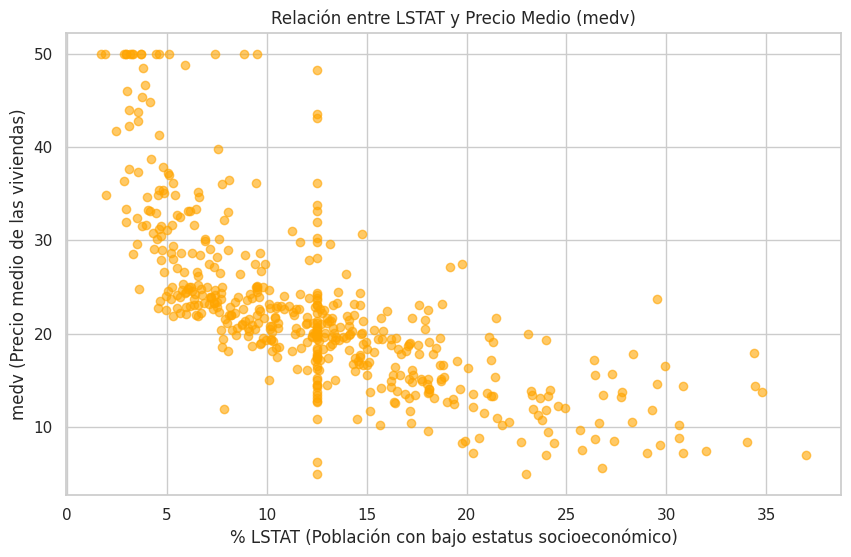

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(df_vecinos['lstat'], df_vecinos['medv'], color='orange', alpha=0.6)
plt.title('Relación entre LSTAT y Precio Medio (medv)')
plt.xlabel('% LSTAT (Población con bajo estatus socioeconómico)')
plt.ylabel('medv (Precio medio de las viviendas)')
plt.show()


###**Conclusión**
De acuerdo con la gráfica anterior:
1.   Existe una relación negativa clara: a mayor porcentaje de población con bajo estatus socioeconómico (lstat), menor es el precio medio de las viviendas (medv).
2.   Los valores de medv caen rápidamente cuando lstat supera el 15 %,
3.  Las zonas con menor lstat mantienen precios mucho más altos y estables.



###**Pie Chart – Proporción de viviendas** 📊

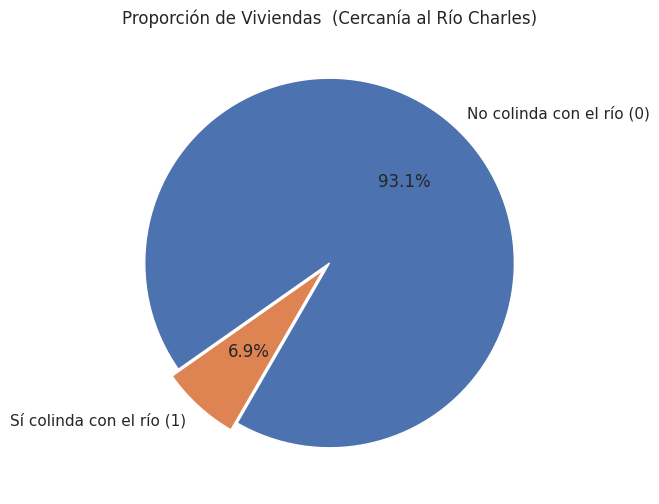

In [15]:
# Contar cuántas viviendas pertenecen a cada categoría (0 y 1)
chas_counts = df_vecinos['chas'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(
    chas_counts,
    labels=['No colinda con el río (0)', 'Sí colinda con el río (1)'],
    autopct='%1.1f%%',
    explode=[0, 0.05],   # pequeño efecto visual como el del profe
    startangle=240
)
plt.title('Proporción de Viviendas  (Cercanía al Río Charles)')
plt.show()


###**BOX PLOT  — Distribución de rm (habitaciones)** 📊

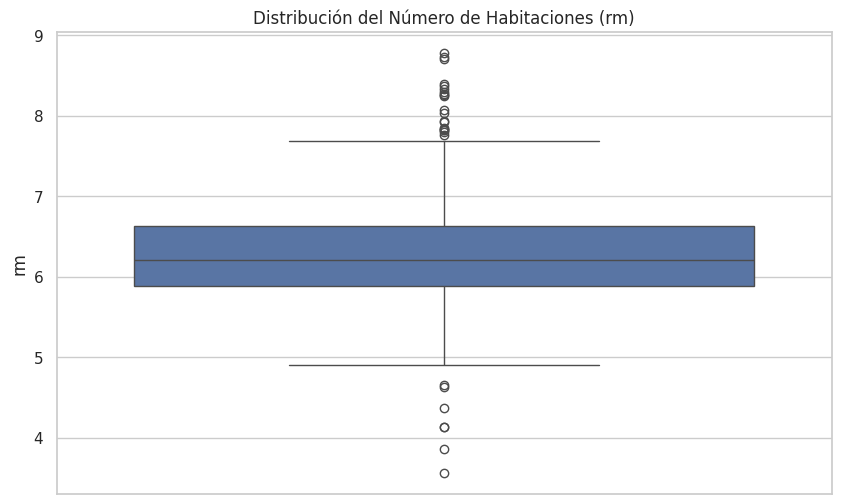

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df_vecinos['rm'])
plt.title('Distribución del Número de Habitaciones (rm)')
plt.ylabel('rm')
plt.show()


###Conclusión


1.   La mayoría de casas tienen entre 5 y 7 habitaciones.
2.   Hay pocos valores extremos por encima de 8 habitaciones.



###**BOX PLOT — Distribución de lstat (nivel socioeconómico)** 📊

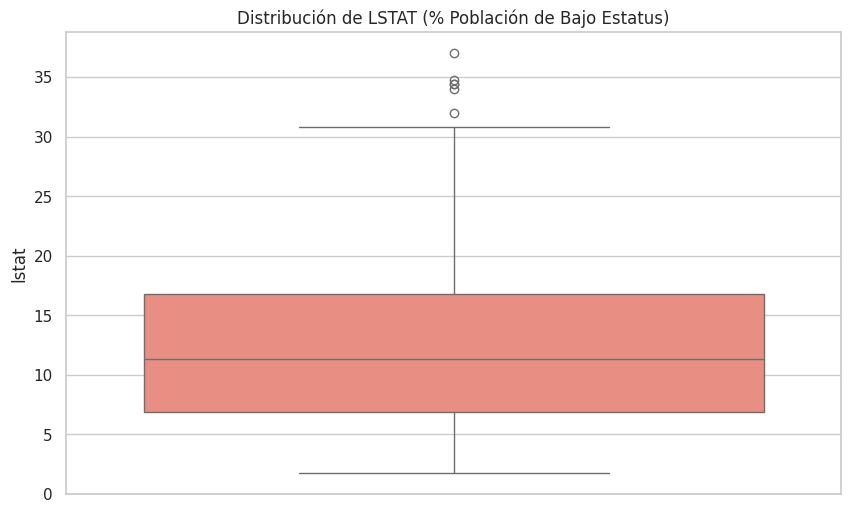

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df_vecinos['lstat'], color='salmon')
plt.title('Distribución de LSTAT (% Población de Bajo Estatus)')
plt.ylabel('lstat')
plt.show()


###Conclusión


1.   LSTAT muestra alta variabilidad, reflejando diferencias marcadas entre zonas.
2.   Se observan varios valores extremos altos.
3.  Indica que algunas áreas tienen niveles de pobreza significativamente mayores.



###**Count Plot — Viviendas**

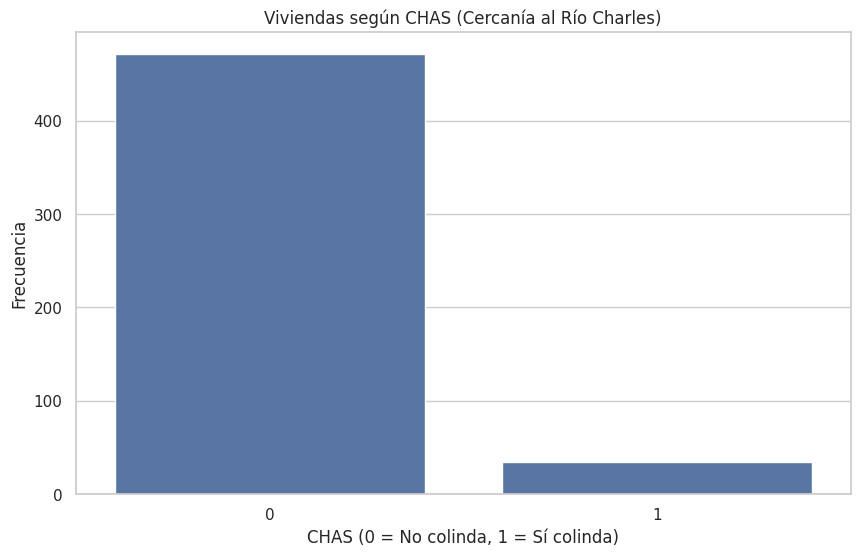

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='chas', data=df_vecinos)
plt.title('Viviendas según CHAS (Cercanía al Río Charles)')
plt.xlabel('CHAS (0 = No colinda, 1 = Sí colinda)')
plt.ylabel('Frecuencia')
plt.show()


###Conclusión


1.   La mayoría de viviendas se encuentran lejos del río Charles (valor 0).
2.   Solo un pequeño porcentaje colinda directamente con el río (valor 1)
3.   Al ser una característica poco frecuente, puede representar un factor exclusivo que influya en el precio de las viviendas cercanas al río.



###**Paso 6: Conversión de Variables a Número**

In [19]:
df_with_nans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       456 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    456 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


###El dataset Boston Housing no contiene variables categóricas reales excepto chas.

In [20]:
from sklearn.preprocessing import LabelEncoder

# Copiamos el DataFrame trabajado con NaN
df_codificado = df_vecinos.copy()

# LabelEncoder para la única variable categórica
label_encoder = LabelEncoder()

df_codificado['chas'] = label_encoder.fit_transform(df_codificado['chas'])

df_codificado.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


###**Conclusión**


1.   Aunque chas ya estaba representada con 0 y 1, se codificó con LabelEncoder para cumplir con el proceso de preparación de datos.
2.   Todas las demás columnas ya son numéricas (float64 o int64), por lo que no requieren conversión adicional.



###**Paso 7: Normalización de Datos (MinMaxScaler)**

###Aplicar Normalización con MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador
scaler = MinMaxScaler()

# Normalizar la variable medv
df_vecinos["medv_normalizado"] = scaler.fit_transform(df_vecinos[["medv"]])

# Mostrar primeras filas
df_vecinos[["medv", "medv_normalizado"]].head()


,medv,medv_normalizado
0,24.0,0.422222
1,21.6,0.368889
2,34.7,0.660000
3,33.4,0.631111
4,36.2,0.693333


###Histograma comparativo (Original vs Normalizado)

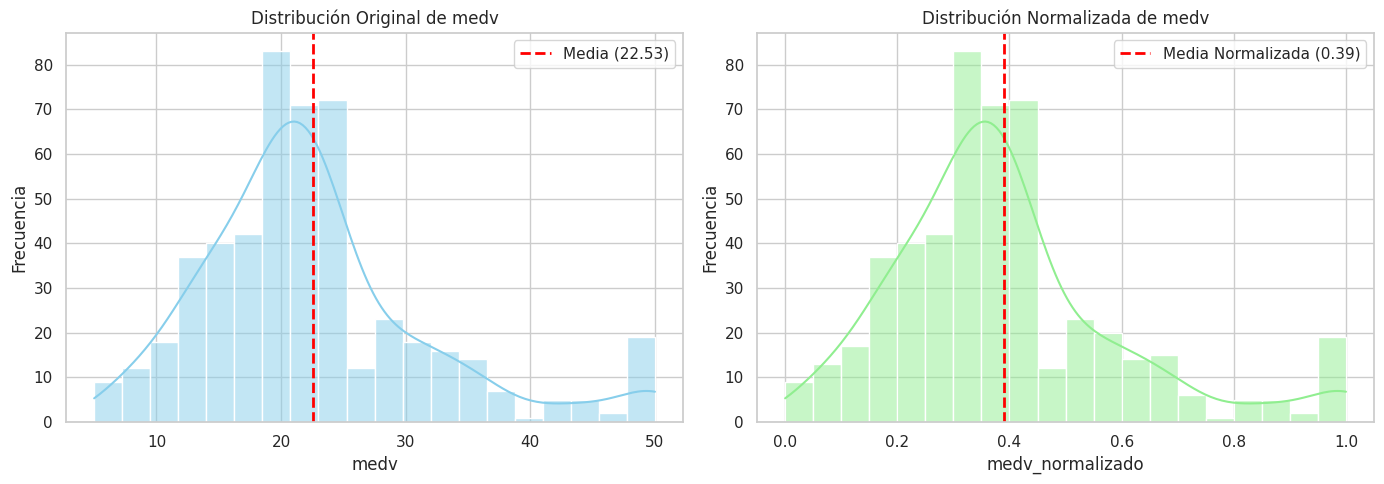

In [22]:
plt.figure(figsize=(14,5))

# Histograma original
plt.subplot(1,2,1)
sns.histplot(df_vecinos["medv"], bins=20, kde=True, color="skyblue")
plt.axvline(df_vecinos["medv"].mean(), color="red", linestyle="--", linewidth=2,
            label=f"Media ({df_vecinos['medv'].mean():.2f})")
plt.title("Distribución Original de medv")
plt.xlabel("medv")
plt.ylabel("Frecuencia")
plt.legend()

# Histograma normalizado
plt.subplot(1,2,2)
sns.histplot(df_vecinos["medv_normalizado"], bins=20, kde=True, color="lightgreen")
plt.axvline(df_vecinos["medv_normalizado"].mean(), color="red", linestyle="--", linewidth=2,
            label=f"Media Normalizada ({df_vecinos['medv_normalizado'].mean():.2f})")
plt.title("Distribución Normalizada de medv")
plt.xlabel("medv_normalizado")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()


###Conclusion
De acuerdo con la normalización aplicada:


1.  La escala original de medv, cuyos valores van aproximadamente entre 5 y 50, fue transformada a un rango entre 0 y 1 usando MinMaxScaler.
2.   La forma de la distribución no cambia, únicamente se comprime en una nueva escala útil para modelos de Machine Learning.
3.   La media del valor normalizado se ajusta al nuevo rango, pero mantiene la misma estructura de variabilidad relativa.



###**Paso 8: Análisis de Correlación**

###1. Calcular la matriz de correlación (Pearson)

In [23]:
# Seleccionar solo columnas numéricas
df_numerico = df_vecinos.select_dtypes(include=['number'])

# Matriz de correlación
matriz_corr = df_numerico.corr(method="pearson")

# Mostrar matriz
matriz_corr


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_normalizado
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.212008,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.444099,-0.388305,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.284659,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.413545,0.360445,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.394225,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.596520,-0.483725,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.100807,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.052590,0.175260,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.298096,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.598238,-0.427321,-0.427321
rm,-0.212008,0.284659,-0.394225,0.100807,-0.298096,1.000000,-0.224116,0.198451,-0.211850,-0.295034,-0.350632,0.126778,-0.595180,0.687737,0.687737
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.224116,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.595486,-0.376955,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.198451,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.494648,0.249929,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.211850,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.483724,-0.381626,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.295034,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.539672,-0.468536,-0.468536


###2. Heatmap de correlación

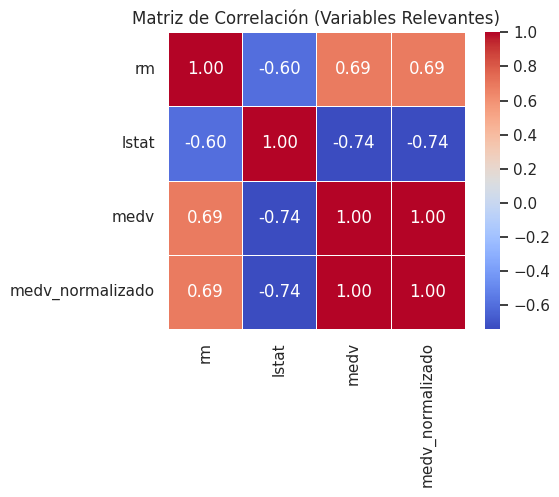

In [27]:
variables = ["rm", "lstat", "medv", "medv_normalizado"]
corr = df_vecinos[variables].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Matriz de Correlación (Variables Relevantes)")
plt.tight_layout()
plt.show()




###**Conclusion**
De acuerdo con la matriz de correlación obtenida:


1.   lstat presenta la correlación negativa más fuerte con medv, indicando que a mayor porcentaje de población de bajo estatus, menor es el valor de la vivienda.
2.   rm muestra una correlación positiva moderada con medv, lo que sugiere que más habitaciones se asocian con viviendas de mayor precio.
3.  El heatmap permite identificar de forma rápida las relaciones más importantes entre variables sin sobrecargar la visualización.


###**Paso 9 — Test de Normalidad (Shapiro-Wilk)**

Estadístico de Shapiro-Wilk: 0.9171758803890093
p-valor: 4.941386258635722e-16
Conclusión: Los datos NO siguen una distribución normal (se rechaza normalidad).


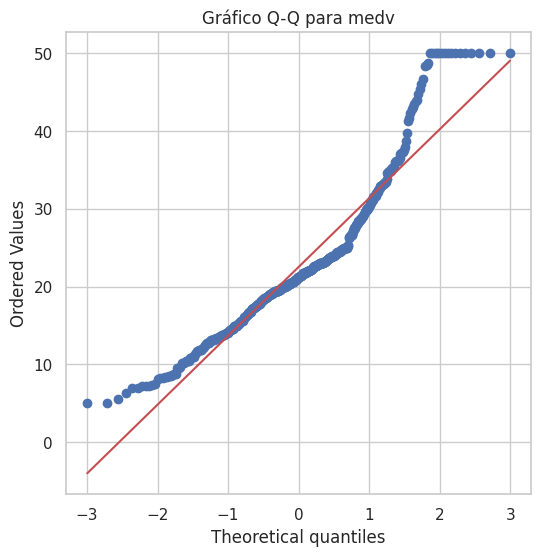

In [29]:
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt

# 1. Test de Shapiro-Wilk
statistic, p_value = shapiro(df_vecinos["medv"])

print("Estadístico de Shapiro-Wilk:", statistic)
print("p-valor:", p_value)

# 2. Interpretación del p-valor
if p_value > 0.05:
    print("Conclusión: Los datos NO permiten rechazar la normalidad (distribución posiblemente normal).")
else:
    print("Conclusión: Los datos NO siguen una distribución normal (se rechaza normalidad).")

# 3. Gráfico Q-Q
plt.figure(figsize=(6,6))
probplot(df_vecinos["medv"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para medv")
plt.show()



###Conclusión
De acuerdo con la gráfica y el resultado del test:
1.   El p-valor es menor a 0.05, por lo que se rechaza la hipótesis de normalidad.
2.   En el gráfico Q-Q, los puntos se alejan notablemente de la línea roja, confirmando visualmente que la distribución no es normal.


###**Paso 10: Pregunta de Investigación**
¿Es posible predecir el precio promedio de las viviendas usando las variables rm y lstat?

###**Paso 11: Ejercicio de Predicción (Regresión Lineal)**

###Distribuciones de las Variables

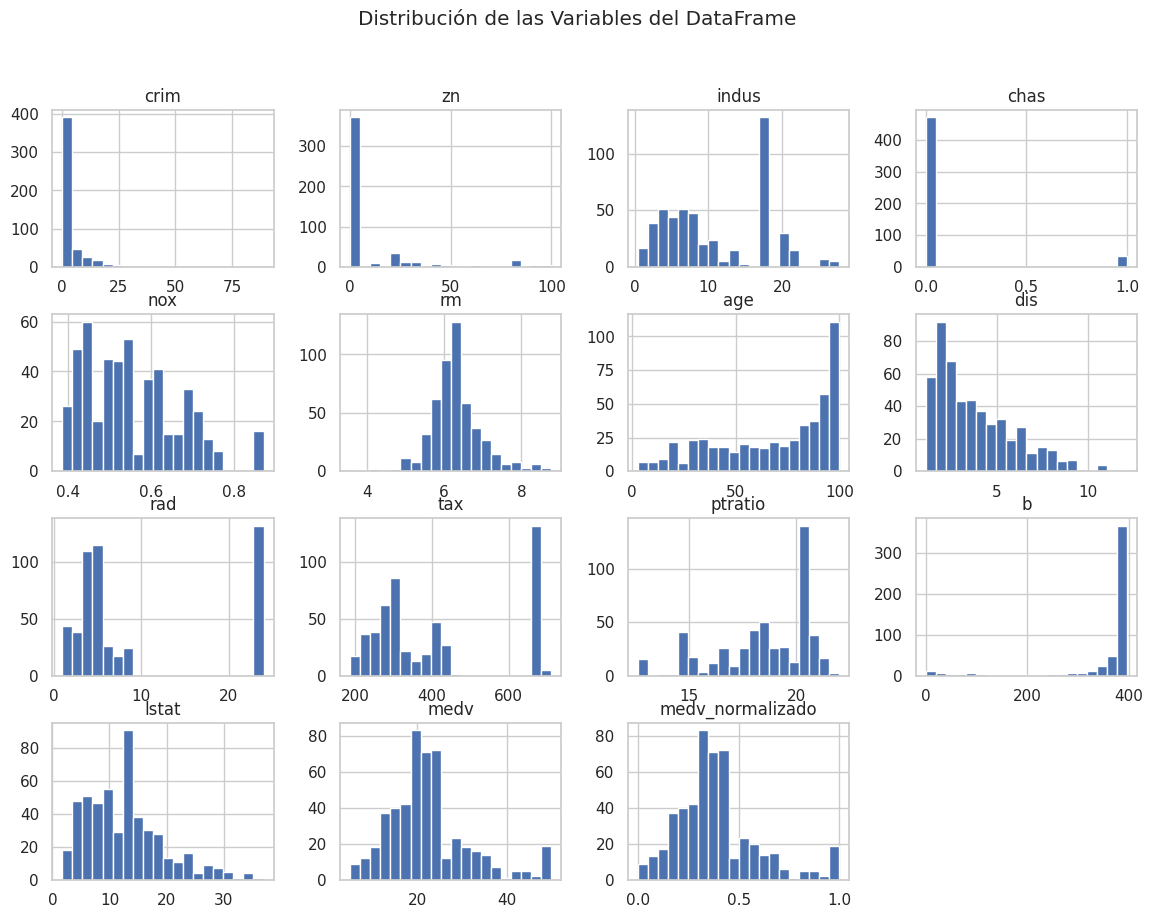

In [58]:
df_vecinos.hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribución de las Variables del DataFrame')
plt.show()


###**Matriz de Correlación💻**






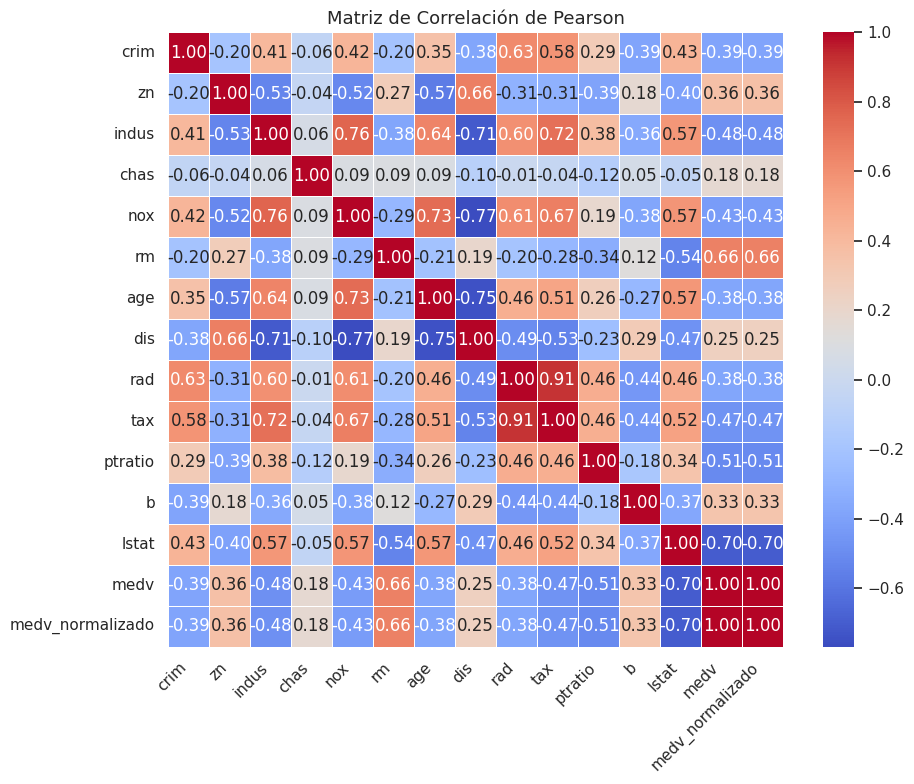

Observamos que rm presenta una correlación positiva fuerte con medv, mientras que lstat muestra una correlación negativa alta, siendo ambas variables relevantes para la predicción del precio.


In [69]:
corr_matrix = df_vecinos.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    square=True
)

plt.title('Matriz de Correlación de Pearson', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print('Observamos que rm presenta una correlación positiva fuerte con medv, mientras que lstat muestra una correlación negativa alta, siendo ambas variables relevantes para la predicción del precio.')


###Normalización (Escalado Min-Max)

In [60]:
from sklearn.preprocessing import MinMaxScaler

features = ['rm', 'lstat']
target = 'medv'

scaler = MinMaxScaler()
df_scaled = df_vecinos.copy()
df_scaled[features] = scaler.fit_transform(df_vecinos[features])

df_scaled.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_normalizado
0,0.00632,18.0,2.31,0,0.538,0.524581,65.2,4.0900,1,296,15.3,396.90,0.092199,24.0,0.422222
1,0.02731,0.0,7.07,0,0.469,0.547998,78.9,4.9671,2,242,17.8,396.90,0.210213,21.6,0.368889
2,0.02729,0.0,7.07,0,0.469,0.524581,61.1,4.9671,2,242,17.8,392.83,0.065248,34.7,0.660000
3,0.03237,0.0,2.18,0,0.458,0.658555,45.8,6.0622,3,222,18.7,394.63,0.034326,33.4,0.631111
4,0.06905,0.0,2.18,0,0.458,0.687105,54.2,6.0622,3,222,18.7,396.90,0.102128,36.2,0.693333


###División Train/Test

In [61]:
from sklearn.model_selection import train_test_split

X = df_scaled[features]
y = df_scaled[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} registros')


Tamaño del conjunto de entrenamiento: 404 registros
Tamaño del conjunto de prueba: 102 registros


###Entrenamiento del Modelo Simple

In [62]:
from sklearn.linear_model import LinearRegression

X_train_simple = X_train[['rm']]
X_test_simple = X_test[['rm']]

lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train)

print('Modelo de Regresión Simple entrenado.')
print(f'Coeficiente (pendiente): {lr_simple.coef_[0]:.4f}')
print(f'Intercepto: {lr_simple.intercept_:.4f}')


Modelo de Regresión Simple entrenado.
Coeficiente (pendiente): 48.7888
Intercepto: -2.9570


###Visualización del Modelo Simple

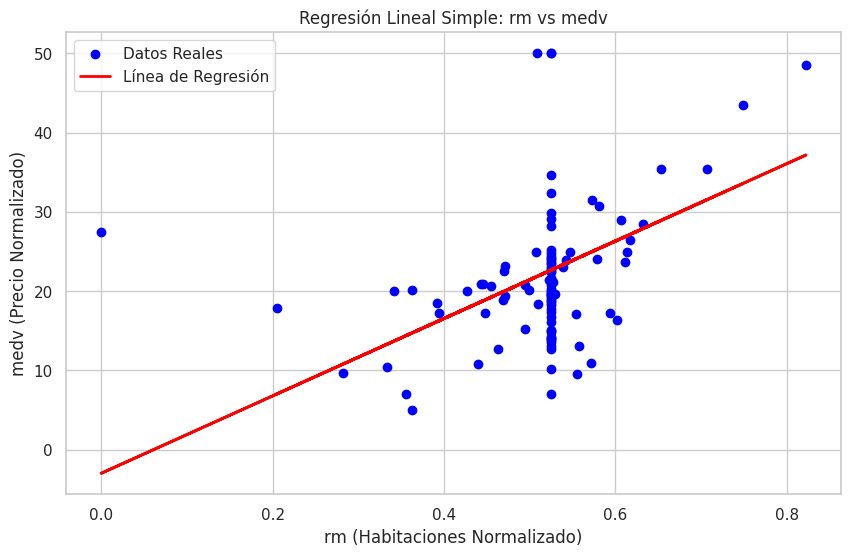

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Datos Reales')
plt.plot(X_test_simple, lr_simple.predict(X_test_simple),
         color='red', linewidth=2, label='Línea de Regresión')

plt.xlabel('rm (Habitaciones Normalizado)')
plt.ylabel('medv (Precio Normalizado)')
plt.title('Regresión Lineal Simple: rm vs medv')
plt.legend()
plt.show()


###Métricas de Evaluación (Simple)

In [64]:
from sklearn import metrics
import numpy as np

y_pred_simple = lr_simple.predict(X_test_simple)

r2_simple = metrics.r2_score(y_test, y_pred_simple)
mae_simple = metrics.mean_absolute_error(y_test, y_pred_simple)
mse_simple = metrics.mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print('Métricas para el Modelo de Regresión Simple:')
print(f'R²: {r2_simple:.4f}')
print(f'MAE: {mae_simple:.4f}')
print(f'MSE: {mse_simple:.4f}')
print(f'RMSE: {rmse_simple:.4f}')


Métricas para el Modelo de Regresión Simple:
R²: 0.1010
MAE: 5.5754
MSE: 65.9280
RMSE: 8.1196


###Entrenamiento del Modelo Múltiple

In [65]:
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

print('Modelo de Regresión Múltiple entrenado.')
print('Coeficientes:')
for feature, coef in zip(features, lr_multiple.coef_):
    print(f'  - {feature}: {coef:.4f}')
print(f'Intercepto: {lr_multiple.intercept_:.4f}')


Modelo de Regresión Múltiple entrenado.
Coeficientes:
  - rm: 31.2177
  - lstat: -21.9151
Intercepto: 12.9176


###Visualización Real vs Predicho

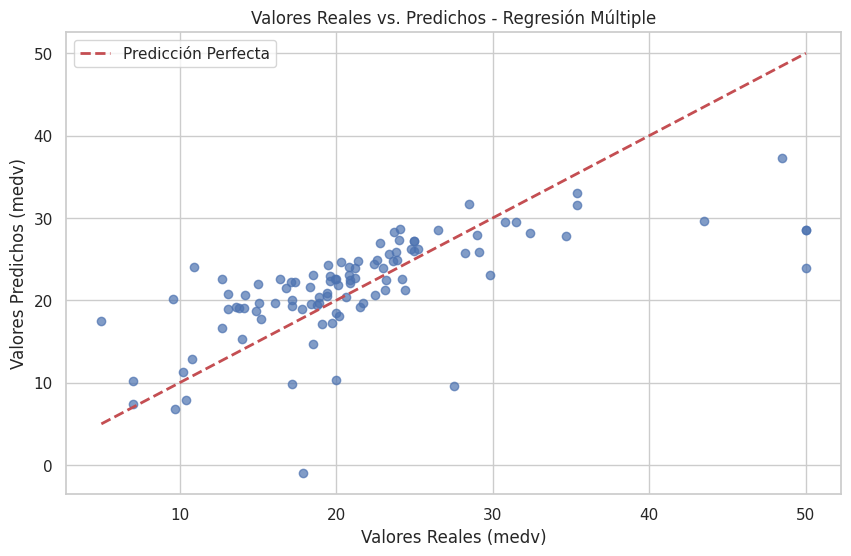

In [66]:
y_pred_multiple = lr_multiple.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción Perfecta')

plt.xlabel('Valores Reales (medv)')
plt.ylabel('Valores Predichos (medv)')
plt.title('Valores Reales vs. Predichos - Regresión Múltiple')
plt.legend()
plt.show()


###Métricas de Evaluación (Múltiple) 💻

In [67]:
r2_multiple = metrics.r2_score(y_test, y_pred_multiple)
mae_multiple = metrics.mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = metrics.mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)

print('Métricas del Modelo de Regresión Múltiple:')
print(f'R²: {r2_multiple:.4f}')
print(f'MAE: {mae_multiple:.4f}')
print(f'MSE: {mse_multiple:.4f}')
print(f'RMSE: {rmse_multiple:.4f}')


Métricas del Modelo de Regresión Múltiple:
R²: 0.4297
MAE: 4.4067
MSE: 41.8251
RMSE: 6.4672


###Comparación de Modelos

In [68]:
metrics_comparison = pd.DataFrame({
    'Regresión Simple': [r2_simple, mae_simple, mse_simple, rmse_simple],
    'Regresión Múltiple': [r2_multiple, mae_multiple, mse_multiple, rmse_multiple]
}, index=['R²', 'MAE', 'MSE', 'RMSE'])

metrics_comparison


,Regresión Simple,Regresión Múltiple
R²,0.100987,0.429662
MAE,5.575420,4.406675
MSE,65.927989,41.825052
RMSE,8.119605,6.467229
